In [11]:
import glob
import re
import matplotlib.pyplot as plt

In [12]:
# 2) Listado de todos los archivos out_*.out en la carpeta actual
out_files = glob.glob("out_*.out")
print(f"Encontrados {len(out_files)} archivos out_*.out")

Encontrados 80 archivos out_*.out


In [13]:
# 3) Extracción de datos: instancia y valor F[0]
data = {}
for fp in out_files:
    m = re.match(r'out_(.+)_\d+\.out', fp)
    if not m:
        continue
    inst = m.group(1)
    
    # Leer archivo y buscar F[0]
    text = open(fp, 'r').read()
    m2 = re.search(r'F\[0\]\s*=\s*([0-9.]+)', text)
    if not m2:
        continue
    val = float(m2.group(1))
    
    data.setdefault(inst, []).append(val)

In [14]:
# 4) Preparar listas ordenadas
instances = sorted(data)
values    = [data[i] for i in instances]

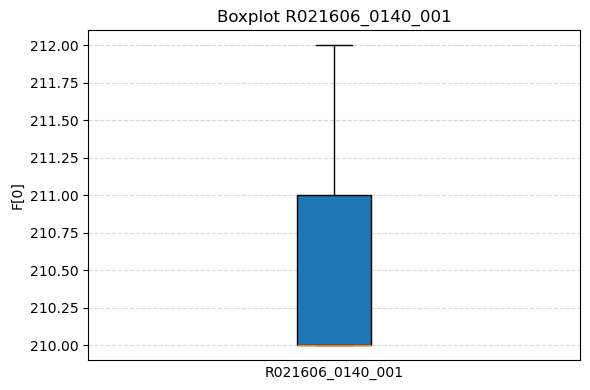

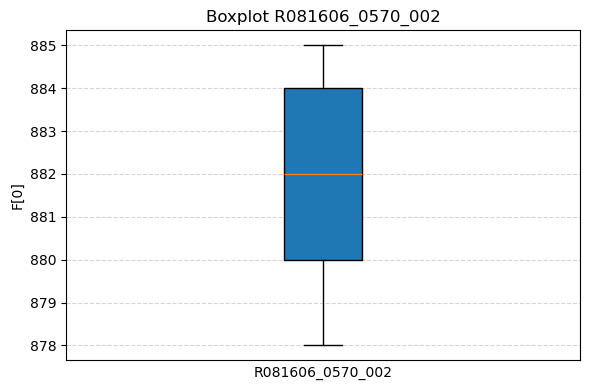

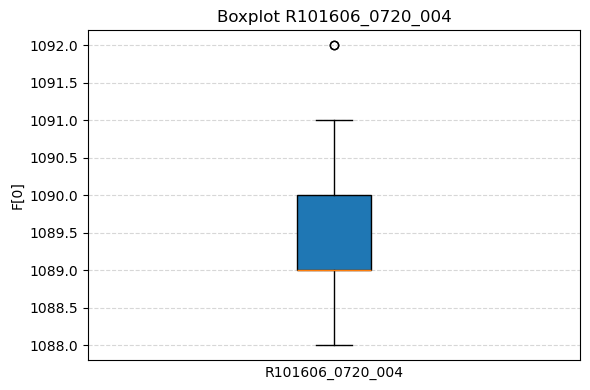

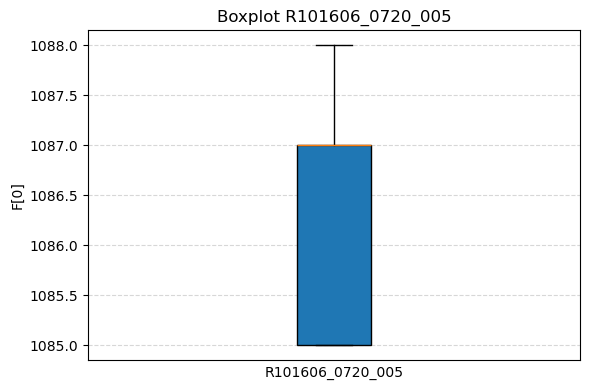

In [15]:
# 5) Dibujar el boxplot
for inst, vals in data.items():
    plt.figure(figsize=(6, 4))
    plt.boxplot(vals, patch_artist=True)
    plt.title(f"Boxplot {inst}")
    plt.xticks([])
    plt.xlabel(f"{inst}")                    
    plt.ylabel("F[0]")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()